1512_241115TRScan1_V99831_CP_0.600Acm2.idf
1471_241115EISScan3_V99831_cp_acid.idf
1472_241115EISScan1_V99831_filename.csv
2024_11_15_11_13_22
1494_241115TRScan1_V99831_CP_0.020Acm2.csv
2024_11_15_12_31_18
1524_241115TRScan1_V99831_CP_0.010Acm2.csv
2024_11_15_12_59_02
1503_241115EISScan1_V99831_EIS_0.001Acm2.idf
1508_241115TRScan1_V99831_CP 1Acm2.csv
2024_11_15_12_44_13
1499_241115EISScan1_V99831_EIS_0.005Acm2.csv
2024_11_15_12_35_50
1470_241115TRScan2_V99831_cp_acid.csv
2024_11_15_11_00_33
1521_241115EISScan1_V99831_EIS_0.050Acm2.idf
1467_241115EISScan7_V99831_cp_acid.idf
1474_241115EISScan1_V99831_filename.idf
1472_241115EISScan1_V99831_filename.idf
1494_241115TRScan1_V99831_CP_0.020Acm2.idf
1471_241115EISScan3_V99831_cp_acid.csv
2024_11_15_11_03_23
1512_241115TRScan1_V99831_CP_0.600Acm2.csv
2024_11_15_12_48_01
1524_241115TRScan1_V99831_CP_0.010Acm2.idf
1467_241115EISScan7_V99831_cp_acid.csv
2024_11_15_10_34_13
1521_241115EISScan1_V99831_EIS_0.050Acm2.csv
2024_11_15_12_56_11
1470_2411

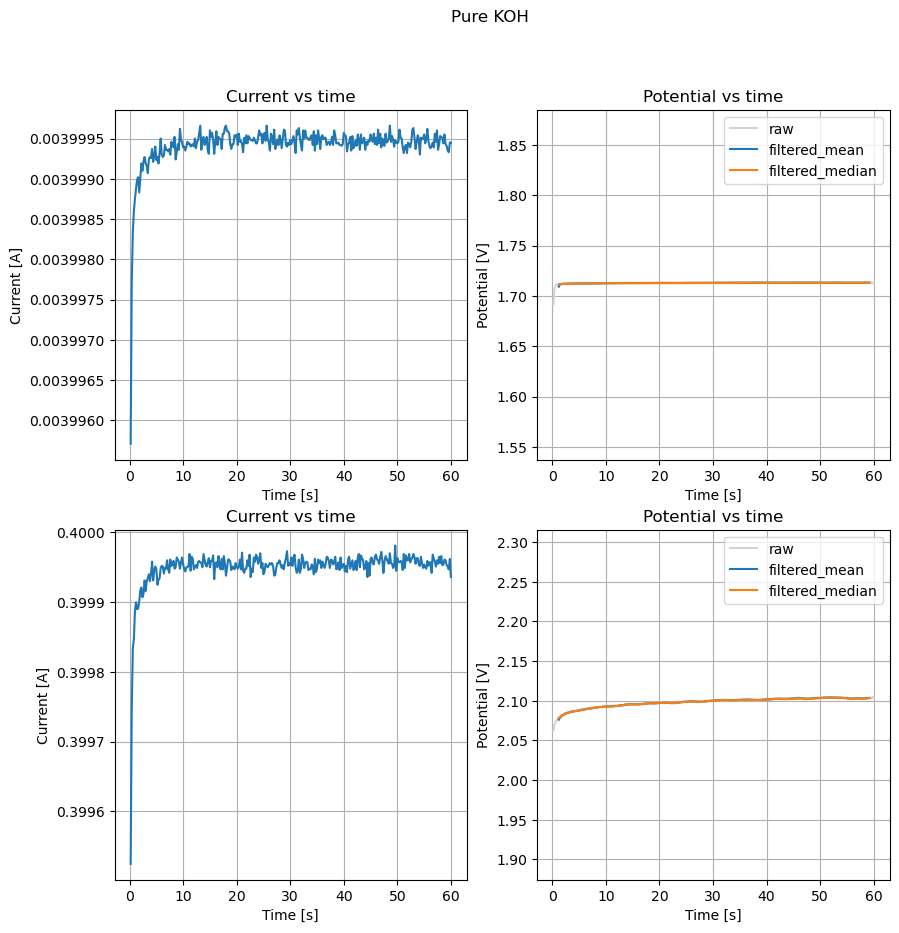

In [1]:
from ProcessingClass import Measurement
import matplotlib.pyplot as plt

A = Measurement((2024, 11,15,11,0,0), (2024, 11, 15, 13,30,0), 'experiment1 6.5M KOH')
data = A.TRScans[:2]
ws = 10


fig, ax = plt.subplots(ncols = 2, nrows = len(data), figsize = (10, 5*len(data)))
fig.suptitle('Pure KOH')
for i in range(len(data)):
    data[i]['potential_filtered_mean'] = data[i]['potential'].rolling(window=ws, center=True).mean()
    data[i]['potential_filtered_median'] = data[i]['potential'].rolling(window=ws, center=True).median()
    ax[i, 0].set_title('Current vs time')
    ax[i, 0].plot(data[i]['time'], data[i]['current'])
    ax[i, 0].grid()
    ax[i, 0].set_xlabel('Time [s]')
    ax[i, 0].set_ylabel('Current [A]')

    ax[i, 1].set_title('Potential vs time')
    ax[i, 1].plot(data[i]['time'], data[i]['potential'], label = 'raw', color = 'lightgrey')
    ax[i, 1].plot(data[i]['time'], data[i]['potential_filtered_mean'], label = 'filtered_mean')
    ax[i, 1].plot(data[i]['time'], data[i]['potential_filtered_median'], label = 'filtered_median')
    ax[i, 1].grid()
    ax[i, 1].set_xlabel('Time [s]')
    ax[i, 1].set_ylabel('Potential [V]')
    ax[i, 1].legend()
    ax[i, 1].set_ylim(min(data[i]['potential'])/1.1, max(data[i]['potential'])*1.1)

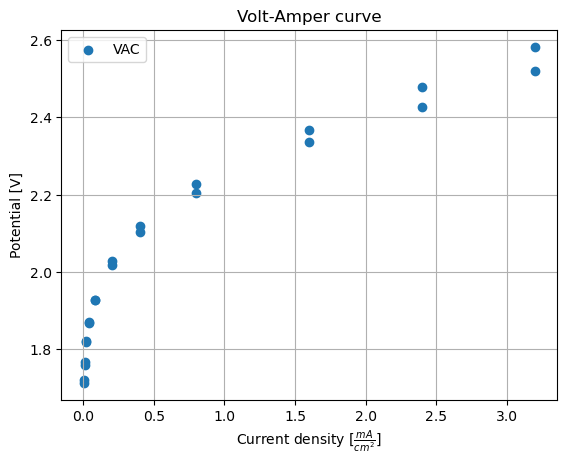

In [2]:
plt.scatter(A.js, A.vs, label = 'VAC')
plt.grid()
plt.title('Volt-Amper curve')
plt.xlabel('Current density [$\\frac{mA}{cm^2}$]')
plt.ylabel('Potential [V]')
plt.legend()

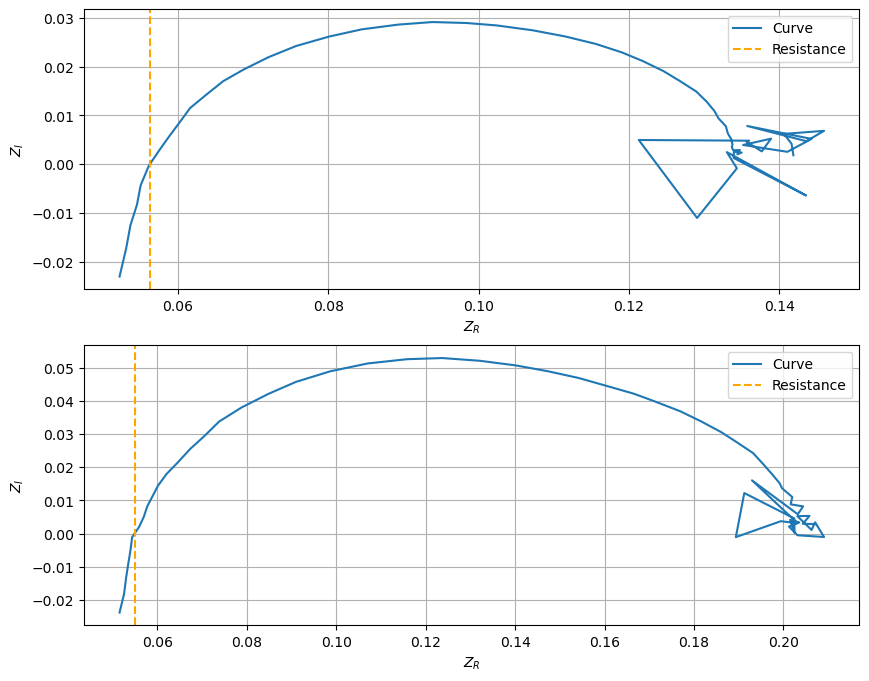

In [3]:
data = A.ZZplots[:2]
#data['potential_filtered'] = medfilt(data['potential'], kernel_size=11)
ws = 10


fig, ax = plt.subplots(nrows = len(data), figsize = (10, 4*len(data)))
for i in range(len(data)):
    ax[i].plot(data[i]['1'], data[i]['2'], label = 'Curve')
    ax[i].grid()
    ax[i].set_xlabel('$Z_R$')
    ax[i].set_ylabel('$Z_I$')
    ax[i].axvline(A.rs[i], linestyle ='--', color = 'orange', label = 'Resistance')
    ax[i].legend(loc = 'upper right')

Text(0, 0.5, 'Resistance [$\\Omega$]')

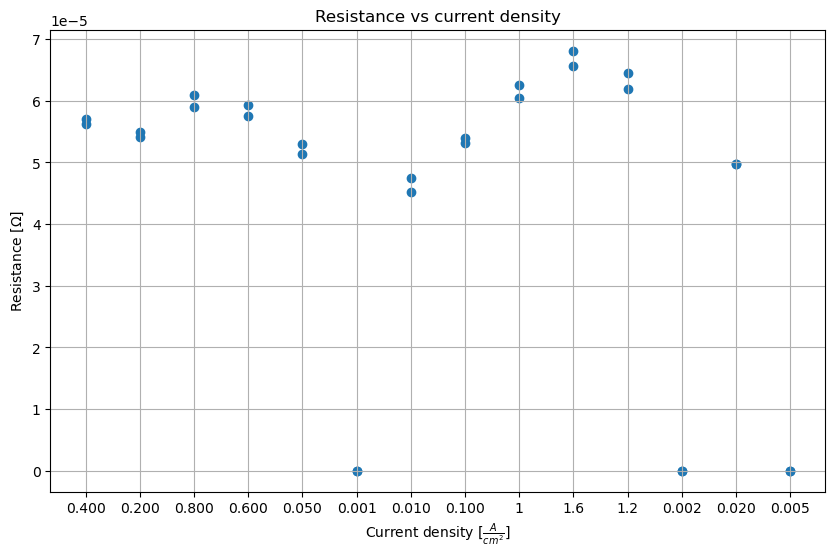

In [4]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(A.currents_ZZ, A.rs/1000)
ax.grid()
ax.set_title('Resistance vs current density')
ax.set_xlabel('Current density [$\\frac{A}{cm^2}$]')
ax.set_ylabel('Resistance [$\\Omega$]')